cancer data set keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

cancer data shape: (569, 30)

features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Accuracy on training set: 0.995

Accuracy on test data set: 0.951

Feature importances: [0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.


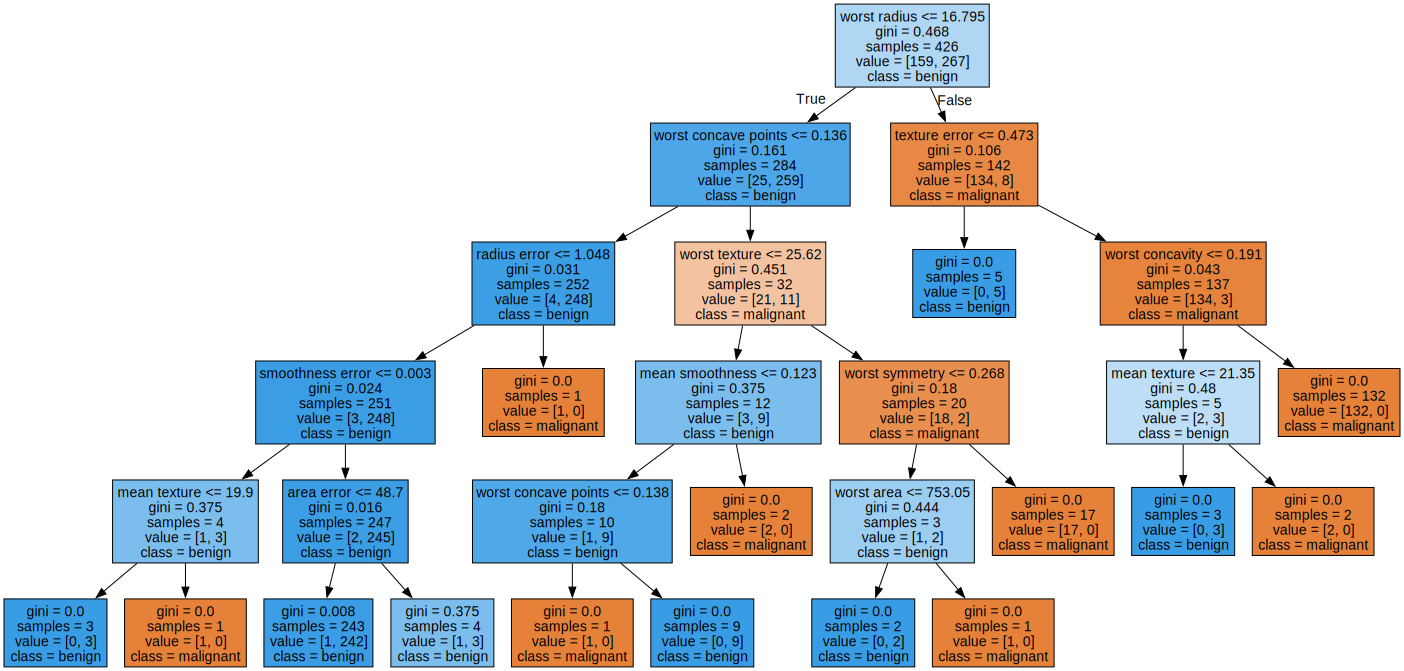

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

cancer = load_breast_cancer()
print("cancer data set keys: {}\n".format(cancer.keys()))
print("cancer data shape: {}\n".format(cancer.data.shape))
print("features: {}\n".format(cancer.feature_names))

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}\n".format(tree.score(X_train, y_train)))
print("Accuracy on test data set: {:.3f}\n".format(tree.score(X_test, y_test)))
print("Feature importances: {}\n".format(tree.feature_importances_))

tree_file = "tree.dot"

export_graphviz(tree, out_file=tree_file, class_names=['malignant', 'benign'],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open(tree_file) as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

feature_importances_ = [0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.
 0.         0.         0.70786451 0.03236422 0.         0.00680904
 0.         0.         0.01771345 0.1281193  0.01157537 0.        ]


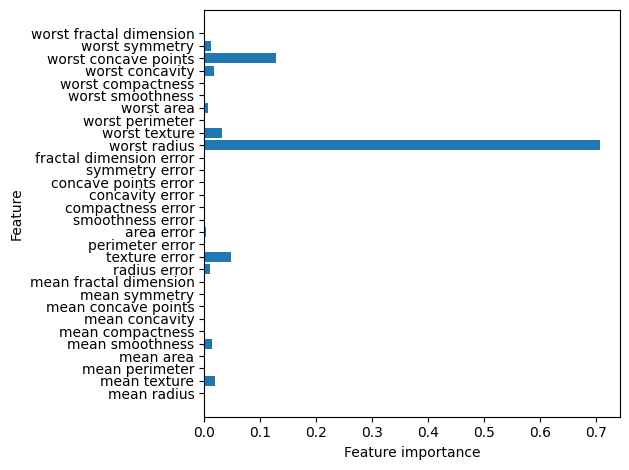

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    print("feature_importances_ = {}".format(model.feature_importances_))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.tight_layout()


plot_feature_importances_cancer(tree)

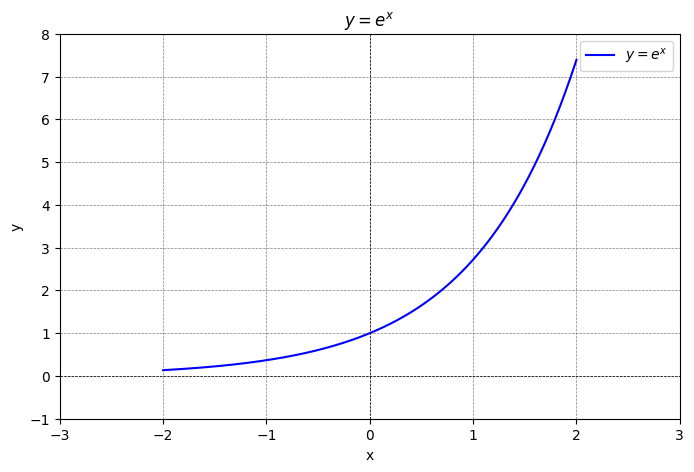

In [32]:
# 定义 x 的范围
x = np.linspace(-2, 2, 400)  # 从 -2 到 2，生成 400 个点
y = np.exp(x)  # 计算 y = e^x

# 创建图形
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='$y = e^x$', color='blue')
plt.title('$y = e^x$')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.ylim(-1, 8)  # 设置 y 轴范围
plt.xlim(-3, 3)  # 设置 x 轴范围
plt.show()